### Attention

- **등장 배경** <br>
encoder의 출력은 고정 길이 벡터이고, 고정 길이 벡터는 입력 문장의 길이에 관계없이 항상 같은 길이의 벡터로 변환한다. 아무리 긴 문장이 입력되더라도 항상 똑같은 길이의 벡터로 밀어 넣는다.


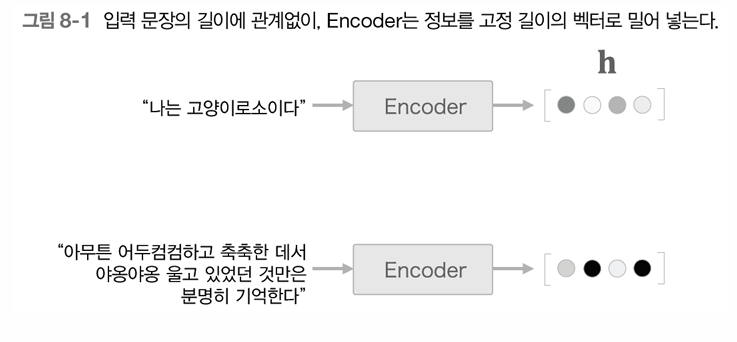

LSTM 계층의 마지막 은닉 상태만을 Decoder에 전달하고, 따라서 Decoder는 Encoder의 (LSTM 계층의) 마지막 은닉 상태만을 이용하게 된다. Encoder의 출력 길이는 입력 문장에   따라 바꿔주도록 한다. 

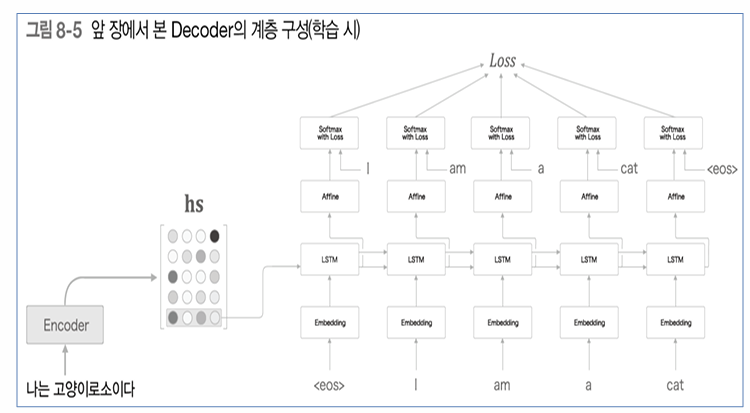

Allignment(얼라이먼트)는 단어의 대응관계를 나타내는 정보로, 사람이 수작업으로 만든다. <br>
<br>
Attention 메커니즘은 소스 문장의 모든 정보를 고정된 길이의 벡터로 압축하는 기존의 Seq2Seq 모델의 한계를 넘어서, 정보 손실을 최소화하는 방식으로 소개되었다.<br> 이를 통해 모델은 문장의 어느 부분에 더 집중해야 할지를 동적으로 결정할 수 있게 되었고, 결과적으로 번역의 정확도와 효율성이 크게 향상되게 된다.<br>
<br>
Attention의 기본 아이디어는 디코더에서 출력 단어를 예측하는 매 시점마다, 인코더에서의 전체 입력 문장을 다시 한 번 참고한다는 점이다. <br>
이 때 전체 입력 문장을 전부 다 동일한 비율로 참고하는 것이 아니라, 해당 시점에서 예측해야할 단어와 연관이 있는 입력 단어 부분을 좀 더 집중해서 보게 된다.<br>

**Attention key idea**
1. 도착어 단어와 대응 관계에 있는 **출발어 단어**의 정보를 골라 내는 것
2. 필요한 정보에만 주목하여 그 정보로부터 **시계열 변환**을 수행하는 것

단어들의 얼라이먼트를 추출하기 위해 각 시각에서 Decoder에 입력된 단어와 대응관계인 단어의 벡터를 hs에서 선택한다.<br>
선택은 미분가능하지 않으므로, 모든것을 선택하여 미분가능하게 만든다.<br>

단어의 중요도를 나타내는 가중치를 별도로 계산하고, 맥락 백터는 가중치a와 각 단어의 벡터 hs로부터 가중합으로 구한다.

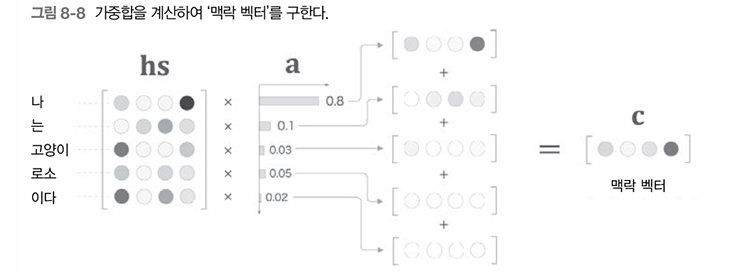

아래 그림은 가중합 계산 그래프이다. T는 시계열 길이, H는 은닉 상태 벡터 원소수이다.

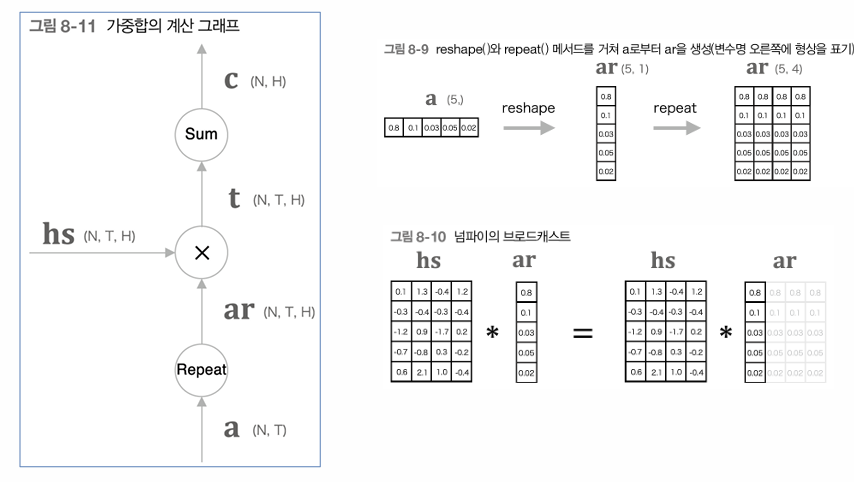

가중치(a)를 알면 가중합을 이용해서 맥락 벡터를 얻을 수 있다. <br>
가중치를 구하는 방법은 다음과 같다.<br>
1. h가 hs의 각 단어 벡터와 얼마나 비슷한가를 수치화
2. 두 벡터의 유사도를 표현하는 내적을 이용
3. 소프트맥스 함수를 이용한 정규화

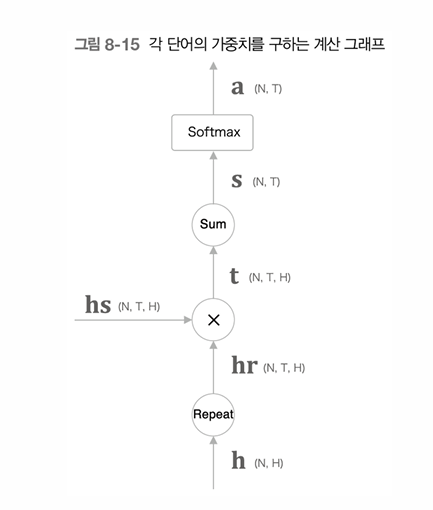

맥락 벡터를 계산하는 계산 그래프는 아래와 같다. <br>
왼쪽은 어텐션 메커니즘의 계산 과정을 단계별로 보여주고 있고, 오른쪽은 이 과정을 더 간단하게 요약한 것이다.

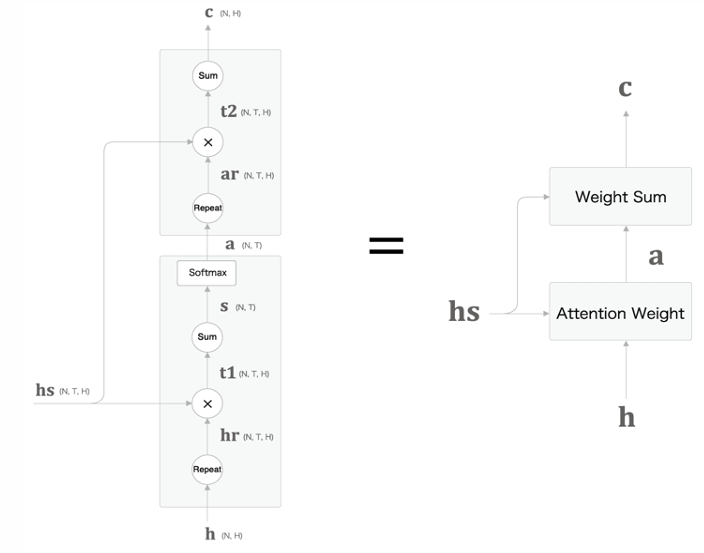

**컨텍스트 벡터 계산**<br>
hr (N, T, H): hs를 a의 형태에 맞추기 위해 반복 <br>
ar (N, T, H): hr와 a를 요소별 곱셈(Element-wise Multiplication) -> 각 타임스텝의 히든 스테이트에 어텐션 가중치를 적용하는 과정<br>
t2 (N, H): ar을 타임스텝 차원(T)에 대해 합산하여 최종 컨텍스트 벡터 c를 만든다.

두 개의 블록으로 나뉘어 있는 오른쪽 그래프를 보면,<br>
Attention Weight: hs와 h로부터 어텐션 가중치 a를 계산<br>
Weight Sum: 이 가중치 a를 사용하여 hs의 각 타임스텝에 가중치를 부여하고, 가중합을 통해 최종 컨텍스트 벡터 c를 생성하는 것을 볼 수 있다.

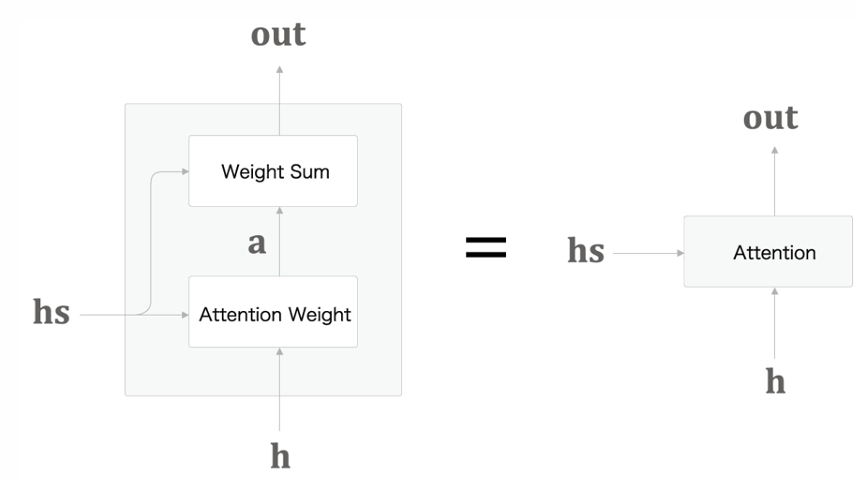

위 그래프도 어텐션 메커니즘을 간단히 나타낸 것이다. <br>
<br>
먼저 왼쪽 그림을 보면 hs와 h를 사용하여 어텐션 가중치 a를 계산하고, 계산된 어텐션 가중치 a를 사용하여 hs의 각 타임스텝에 가중치를 부여하고 이를 합산하여 최종 출력 벡터 out을 만든다.<br>
<br>
오른쪽 그래프는 어텐션 메커니즘을 하나의 블록으로 추상화하여 나타낸 것입니다. 전체 과정을 하나의 Attention 블록으로 묶어서, 입력 (hs와 h)에서 출력 (out)으로 변환하는 과정을 간단히 표현했다.

아래 그림은 Attention 계층을 갖춘 Decoder의 계층 구성을 나타낸 것이다.

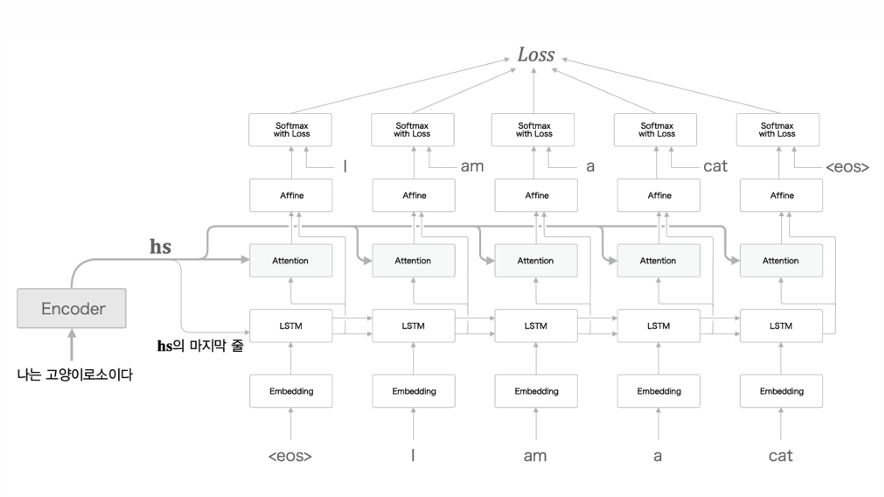